In [15]:
!gsutil cp gs://chem_dsrc/P0_Toxcast/Data/toxcast_assay_list_기전.csv ./

Copying gs://chem_dsrc/P0_Toxcast/Data/toxcast_assay_list_기전.csv...
/ [1 files][ 57.2 KiB/ 57.2 KiB]                                                
Operation completed over 1 objects/57.2 KiB.                                     


In [2]:
import pandas as pd 
Info_339_Intended_target_Toxcast_assays = pd.read_csv("./Data/Info_339_Intended_target_Toxcast_assays.csv")

In [3]:
Info_339_Intended_target_Toxcast_assays

,Tox mechanism,AEID,Assay Name,Intended target,Intended target family,Intended target subfamily,Number of chemicals,Active chemicals,Active chemicals (%),Inactive chemicals,Model,Assay format,Time,Function,Detection,Positive Chemical
0,,806,TOX21_AhR_LUC_Agonist,AHR,dna binding,basic helix-loop-helix protein,7932,809,10.2,7123,HepG2,microplate: 1536-well plate,24.0,reporter gene,Luminescence,Omeprazole
1,AHR-cyp,767,TOX21_Aromatase_Inhibition,CYP19A1,cyp,steroidogenesis-related,7197,1169,16.2,6028,MCF-7,microplate: 1536-well plate,24.0,reporter gene,Luminescence,Letrozole
2,AHR-cyp,1131,TOX21_VDR_BLA_agonist_ratio,CYP24A1,cyp,xenobiotic metabolism,7197,70,1.0,7127,HEK293T,microplate: 1536-well plate,24.0,reporter gene,Fluorescence,Calcitriol
3,AHR-cyp,1132,TOX21_VDR_BLA_antagonist_ratio,CYP24A1,cyp,xenobiotic metabolism,7197,314,4.4,6883,HEK293T,microplate: 1536-well plate,24.0,reporter gene,Fluorescence,NaN
4,AHR-cyp,63,ATG_Ahr_CIS_up,AHR,dna binding,basic helix-loop-helix protein,3420,448,13.1,2972,HepG2,microplate: 24-well plate,24.0,reporter gene,Fluorescence,6-formylindolo carbazole
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,PPAR,102,ATG_PPRE_CIS_up,PPARA|PPARD|PPARG,nuclear receptor,non-steroidal,3420,536,15.7,2884,HepG2,microplate: 24-well plate,24.0,reporter gene,Fluorescence,Rosiglitazone
335,PPAR,133,ATG_PPARd_TRANS_up,PPARD,nuclear receptor,non-steroidal,3420,72,2.1,3348,HepG2,microplate: 24-well plate,24.0,reporter gene,Fluorescence,GW7647
336,PPAR,134,ATG_PPARg_TRANS_up,PPARG,nuclear receptor,non-steroidal,3420,939,27.5,2481,HepG2,microplate: 24-well plate,24.0,reporter gene,Fluorescence,GW7647
337,PPAR,719,NVS_NR_hPPARg,PPARG,nuclear receptor,non-steroidal,782,180,23.0,602,cell-free,microplate: 384-well plate,2.0,binding,Fluorescence,Ciglitazone


In [6]:
def get_matrix() : 
  for i in range(len(index)) : 
    for c in range(len(columns)) : 
      for k, row in Info_339_Intended_target_Toxcast_assays.iterrows() : 
          noc = row['Number of chemicals'] 
          ap = 100 - row['Active chemicals (%)']
          try : 
            TR_FA = noc >= columns[c] and noc < columns[c+1]
          except : 
            TR_FA = noc >= columns[c]

          try : 
            TR_FA_2 = ap >= index[i] and ap < index[i+1]
          except : 
            TR_FA_2 = ap >= index[i]

          if TR_FA and TR_FA_2 : 
            df_result.loc[ index[i],columns[c] ] += "  /  " + row['Assay Name']

In [7]:
index =[5,10,20,40,50,60,70,80]
columns = [1,100,1000,3000,7000]
df_result = pd.DataFrame(data = " ", index =[5,10,20,40,50,60,70,80], columns = [1,100,1000,3000,7000])
get_matrix()
df_result

,1,100,1000,3000,7000
5,,,,,
10,,/ NVS_ADME_hCYP2C19 / NVS_ADME_hCYP2C9 ...,,,
20,/ NVS_GPCR_hTXA2 / NVS_GPCR_hAdra2A / ...,/ NVS_ADME_hCYP1A2 / NVS_ADME_hCYP2B6 /...,,,
40,/ NVS_ADME_rCYP2C12 / NVS_ENZ_hMMP13 / ...,/ NVS_ADME_hCYP3A4 / NVS_ENZ_hDUSP3 / ...,,,
50,/ NVS_ENZ_hMMP1 / NVS_ENZ_hMMP9 / NVS_...,/ NVS_NR_rAR / NVS_NR_hAR / NVS_ENZ_hE...,,,
60,/ NVS_ADME_hCYP4F12 / NVS_ENZ_hMMP2 / ...,/ NVS_ADME_hCYP1A1 / NVS_ENZ_hMMP3 / N...,/ BSK_hDFCGF_CollagenIII_down / BSK_LPS_...,/ ATG_NRF2_ARE_CIS_up,
70,/ NVS_ENZ_hSIRT2 / NVS_ENZ_hAurA / NVS...,/ NVS_ADME_hCYP19A1 / NVS_ADME_hCYP2A6 ...,/ APR_HepG2_p53Act_72h_up / BSK_KF3CT_MM...,/ ATG_VDRE_CIS_up / ATG_PXR_TRANS_up / ...,/ TOX21_ARE_BLA_agonist_ratio / TOX21_TR...
80,,/ NVS_ENZ_hPI3Ka / NVS_NR_hRAR_Antagonis...,/ OT_AR_ARELUC_AG_1440 / OT_AR_ARSRC1_04...,/ ATG_Ahr_CIS_up / ATG_AR_TRANS_up / T...,/ TOX21_AhR_LUC_Agonist / TOX21_Aromatas...


In [ ]:
# df_result.to_csv("df_result.csv")

In [8]:
# index =[5,10,20,40,50,60,70,80]
# columns = [1,500,2000,4000,6000,8000]
# df_result = pd.DataFrame(data = 0, index =index, columns = columns)
# get_matrix()
# df_result

In [ ]:
# index =[20,40,60,80]
# columns = [1,100,1000,3000,7000]
# df_result = pd.DataFrame(data = 0, index =index, columns = columns)
# get_matrix()
# df_result

In [ ]:
# index =[5,10,20,40,50,60,70,80]
# columns = [1,500,2000,4000,6000,8000]
# df_result = pd.DataFrame(data = 0, index =index, columns = columns)
# get_matrix()
# df_result

In [ ]:
df_result.to_csv("df_result.csv")

In [ ]:
!gsutil cp df_result.csv gs://chem_dsrc/P0_Toxcast/Data/

Copying file://df_result.csv [Content-Type=text/csv]...
/ [1 files][  136.0 B/  136.0 B]                                                
Operation completed over 1 objects/136.0 B.                                      


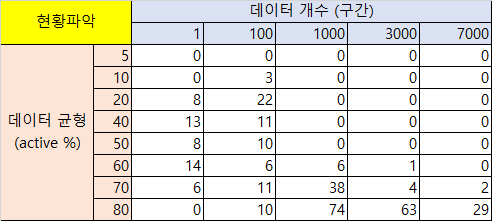

# After Z-score processed

In [16]:
!gsutil cp gs://chem_dsrc/P0_Toxcast/Data/Toxcast_Assay.csv ./

Copying gs://chem_dsrc/P0_Toxcast/Data/Toxcast_Assay.csv...
/ [1 files][ 10.2 MiB/ 10.2 MiB]                                                
Operation completed over 1 objects/10.2 MiB.                                     


In [20]:
import pandas as pd
assays_data_335 = pd.read_csv('./Data/335_ToxcastAssays_IntendedTarget_zcoreFiltered.csv')

In [22]:
assays_data_335.index = assays_data_335.Name

In [28]:
assays_data_335=assays_data_335.drop("Name", axis=1)

In [29]:
assays_data_335

,TOX21_AhR_LUC_Agonist,TOX21_Aromatase_Inhibition,TOX21_VDR_BLA_agonist_ratio,TOX21_VDR_BLA_antagonist_ratio,ATG_Ahr_CIS_up,NVS_ADME_hCYP2C19,NVS_ADME_hCYP19A1,NVS_ADME_hCYP2C9,NVS_ADME_hCYP1A1,NVS_ADME_hCYP1A2,...,TOX21_PPARg_BLA_Agonist_ratio,TOX21_PPARd_BLA_agonist_ratio,TOX21_PPARd_BLA_antagonist_ratio,TOX21_PPARg_BLA_antagonist_ratio,ATG_PPARa_TRANS_up,ATG_PPRE_CIS_up,ATG_PPARd_TRANS_up,ATG_PPARg_TRANS_up,NVS_NR_hPPARg,NVS_NR_hPPARa
Name,,,,,,,,,,,,,,,,,,,,,
100-00-5,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,N,NaN
1000-05-1,N,N,N,N,N,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,NaN,NaN
10001-13-5,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN,...,N,N,N,N,NaN,NaN,NaN,NaN,NaN,NaN
100-01-6,N,N,N,N,N,6.449239794,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,NaN,NaN
100-02-7,N,N,N,N,N,N,NaN,NaN,NaN,NaN,...,N,N,N,N,N,N,N,N,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
NOCAS_903892,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,N,N,N,N,NaN,NaN
NOCAS_903893,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,N,N,N,N,NaN,NaN
NOCAS_903894,NaN,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,N,N,N,N,NaN,NaN


In [30]:
new_dict_assay_noc = {}
new_dict_assay_ac = {}

for i in assays_data_335.columns : 
  chemicals = assays_data_335[i].dropna()
  noc = len(chemicals)
  try : 
    ac  = noc - chemicals.value_counts()['N']
  except : 
    ac = 0
  new_dict_assay_noc[i] = noc
  new_dict_assay_ac[i] = ac


In [31]:
noc_list = list(new_dict_assay_noc.values())
ac_list = list(new_dict_assay_ac.values())
ac_percentage_list = []
for i, value in enumerate(noc_list) :
  try : 
    ac_percentage_list.append(ac_list[i] *100 / value)
  except : 
    ac_percentage_list.append(0)

In [32]:
columns = ['Assay Name', 'Number of chemicals',	'Active chemicals',	'Active chemicals (%)',	'Inactive chemicals'	]
info_assays_data_335 = pd.DataFrame( columns =columns )
info_assays_data_335['Assay Name'] = new_dict_assay_noc.keys()
info_assays_data_335['Number of chemicals'] = new_dict_assay_noc.values()
info_assays_data_335['Active chemicals'] = new_dict_assay_ac.values()
info_assays_data_335['Active chemicals (%)'] = ac_percentage_list

In [33]:
info_assays_data_335

,Assay Name,Number of chemicals,Active chemicals,Active chemicals (%),Inactive chemicals
0,TOX21_AhR_LUC_Agonist,8305,326,3.925346,NaN
1,TOX21_Aromatase_Inhibition,8305,167,2.010837,NaN
2,TOX21_VDR_BLA_agonist_ratio,7521,17,0.226034,NaN
3,TOX21_VDR_BLA_antagonist_ratio,7521,33,0.438771,NaN
4,ATG_Ahr_CIS_up,3849,354,9.197194,NaN
...,...,...,...,...,...
330,ATG_PPRE_CIS_up,3849,224,5.819693,NaN
331,ATG_PPARd_TRANS_up,3849,25,0.649519,NaN
332,ATG_PPARg_TRANS_up,3849,417,10.833983,NaN
333,NVS_NR_hPPARg,814,98,12.039312,NaN


# create Table S1. List of selected 335 assays.


In [34]:
#Get assay order 
!gsutil cp gs://chem_dsrc/P0_Toxcast/Data/335_assay_list.csv ./
assay_list_335 = pd.read_csv('335_assay_list.csv')

Copying gs://chem_dsrc/P0_Toxcast/Data/335_assay_list.csv...
/ [1 files][  6.4 KiB/  6.4 KiB]                                                
Operation completed over 1 objects/6.4 KiB.                                      


In [35]:
assay_list_335

,Assay Name
0,APR_HepG2_p53Act_24h_up
1,APR_HepG2_p53Act_72h_up
2,ATG_Ahr_CIS_up
3,ATG_AR_TRANS_up
4,ATG_p53_CIS_up
...,...
330,TOX21_TR_LUC_GH3_Antagonist
331,TOX21_PPARg_BLA_Agonist_ratio
332,TOX21_PPARd_BLA_agonist_ratio
333,TOX21_PPARd_BLA_antagonist_ratio


In [36]:
assay_list_335.index = assay_list_335['Assay Name']
assay_list_335 = assay_list_335.drop('Assay Name', axis = 1)

In [40]:
info_assays_data_335

,Assay Name,Number of chemicals,Active chemicals,Active chemicals (%),Inactive chemicals
0,TOX21_AhR_LUC_Agonist,8305,326,3.925346,NaN
1,TOX21_Aromatase_Inhibition,8305,167,2.010837,NaN
2,TOX21_VDR_BLA_agonist_ratio,7521,17,0.226034,NaN
3,TOX21_VDR_BLA_antagonist_ratio,7521,33,0.438771,NaN
4,ATG_Ahr_CIS_up,3849,354,9.197194,NaN
...,...,...,...,...,...
330,ATG_PPRE_CIS_up,3849,224,5.819693,NaN
331,ATG_PPARd_TRANS_up,3849,25,0.649519,NaN
332,ATG_PPARg_TRANS_up,3849,417,10.833983,NaN
333,NVS_NR_hPPARg,814,98,12.039312,NaN


In [41]:
info_assays_data_335.index = info_assays_data_335['Assay Name']

In [43]:
Ts1 = assay_list_335.join(info_assays_data_335)

In [44]:
Ts1['Inactive chemicals'] = Ts1['Number of chemicals'] - Ts1['Active chemicals']

In [45]:
Ts1

,Assay Name,Number of chemicals,Active chemicals,Active chemicals (%),Inactive chemicals
Assay Name,,,,,
APR_HepG2_p53Act_24h_up,APR_HepG2_p53Act_24h_up,1061,24,2.262017,1037
APR_HepG2_p53Act_72h_up,APR_HepG2_p53Act_72h_up,1061,41,3.864279,1020
ATG_Ahr_CIS_up,ATG_Ahr_CIS_up,3849,354,9.197194,3495
ATG_AR_TRANS_up,ATG_AR_TRANS_up,3849,25,0.649519,3824
ATG_p53_CIS_up,ATG_p53_CIS_up,3849,22,0.571577,3827
...,...,...,...,...,...
TOX21_TR_LUC_GH3_Antagonist,TOX21_TR_LUC_GH3_Antagonist,8305,500,6.020470,7805
TOX21_PPARg_BLA_Agonist_ratio,TOX21_PPARg_BLA_Agonist_ratio,8305,105,1.264299,8200
TOX21_PPARd_BLA_agonist_ratio,TOX21_PPARd_BLA_agonist_ratio,7521,31,0.412179,7490


In [47]:
Ts1.to_csv("./Data/Table/TS1.csv")

In [52]:
!gsutil cp TS1.csv gs://chem_dsrc/P0_Toxcast/Data/

Copying file://TS1.csv [Content-Type=text/csv]...
/ [1 files][ 22.2 KiB/ 22.2 KiB]                                                
Operation completed over 1 objects/22.2 KiB.                                     


In [50]:
def get_matrix() : 
  for i in range(len(index)) : 
    for c in range(len(columns)) : 
      for k, row in info_assays_data_335.iterrows() : 
          noc = row['Number of chemicals'] 
          ap = 100 - row['Active chemicals (%)']
          # TR_FA, TR_FA_2 = 0,0
          try : 
            TR_FA = noc >= columns[c] and noc < columns[c+1]
          except : 
            TR_FA = noc >= columns[c]

          try : 
            TR_FA_2 = ap >= index[i] and ap < index[i+1]
          except : 
            TR_FA_2 = ap >= index[i]

          if TR_FA and TR_FA_2 : 
            df_result.loc[ index[i],columns[c] ] += 1

In [51]:
index =[0,10,20,40,50,60,70,80]
columns = [0,100,1000,3000,7000]
df_result = pd.DataFrame(data = 0, index =[0,10,20,40,50,60,70,80], columns = [0,100,1000,3000,7000])
get_matrix()
df_result

,0,100,1000,3000,7000
0,0,0,0,0,0
10,0,0,0,0,0
20,0,3,0,0,0
40,0,2,0,0,0
50,1,1,0,0,0
60,3,14,0,1,0
70,9,19,0,0,0
80,24,45,118,66,29


In [52]:
df_result.sum().sum()

335

In [53]:
df_result.to_csv("./Data/Table/assayMatrix_by_noc_db.csv")

In [56]:
def get_matrix() : 
  for i in range(len(index)) : 
    for c in range(len(columns)) : 
      for k, row in info_assays_data_335.iterrows() : 
          noc = row['Number of chemicals'] 
          ap = 100 - row['Active chemicals (%)']
          try : 
            TR_FA = noc >= columns[c] and noc < columns[c+1]
          except : 
            TR_FA = noc >= columns[c]

          try : 
            TR_FA_2 = ap >= index[i] and ap < index[i+1]
          except : 
            TR_FA_2 = ap >= index[i]

          if TR_FA and TR_FA_2 : 
            df_result.loc[ index[i],columns[c] ] += "'"+row['Assay Name']+"'" + ", "

In [57]:
index =[5,10,20,40,50,60,70,80]
columns = [1,100,1000,3000,7000]
df_result = pd.DataFrame(data = ' ', index =[5,10,20,40,50,60,70,80], columns = [1,100,1000,3000,7000])
get_matrix()
df_result

,1,100,1000,3000,7000
5,,,,,
10,,,,,
20,,"'NVS_ADME_hCYP2C19', 'NVS_ADME_hCYP2C9', 'NVS...",,,
40,,"'NVS_ADME_hCYP1A2', 'NVS_ADME_hCYP2B6',",,,
50,"'NVS_ADME_rCYP2C12',","'NCCT_TPO_AUR_dn',",,,
60,"'NCCT_TPO_GUA_dn', 'NVS_GPCR_hAdra2A', 'NVS_G...","'NVS_ADME_hCYP1A1', 'NVS_ADME_hCYP3A4', 'NVS_...",,"'ATG_PXRE_CIS_up',",
70,"'NVS_ADME_hCYP4F12', 'NVS_IC_hKhERGCh', 'NVS_...","'NVS_ADME_hCYP19A1', 'NVS_NR_rAR', 'NVS_ENZ_h...",,,
80,"'NVS_ENZ_hMMP7', 'NVS_ENZ_hMMP2', 'NVS_ENZ_hM...","'NVS_ADME_hCYP2A6', 'NVS_ENZ_hCK1D', 'NVS_ENZ...","'OT_AR_ARELUC_AG_1440', 'OT_AR_ARSRC1_0480', ...","'ATG_Ahr_CIS_up', 'ATG_AR_TRANS_up', 'ATG_p53...","'TOX21_AhR_LUC_Agonist', 'TOX21_Aromatase_Inh..."


In [58]:
df_result.loc[80,7000]

" 'TOX21_AhR_LUC_Agonist', 'TOX21_Aromatase_Inhibition', 'TOX21_VDR_BLA_agonist_ratio', 'TOX21_VDR_BLA_antagonist_ratio', 'TOX21_AR_BLA_Agonist_ratio', 'TOX21_AR_BLA_Antagonist_ratio', 'TOX21_AR_LUC_MDAKB2_Agonist', 'TOX21_p53_BLA_p1_ratio', 'TOX21_p53_BLA_p2_ratio', 'TOX21_p53_BLA_p3_ratio', 'TOX21_p53_BLA_p4_ratio', 'TOX21_p53_BLA_p5_ratio', 'TOX21_HSE_BLA_agonist_ratio', 'TOX21_ELG1_LUC_Agonist', 'TOX21_ERa_BLA_Agonist_ratio', 'TOX21_ERa_BLA_Antagonist_ratio', 'TOX21_ESRE_BLA_ratio', 'TOX21_FXR_BLA_agonist_ratio', 'TOX21_FXR_BLA_antagonist_ratio', 'TOX21_GR_BLA_Agonist_ratio', 'TOX21_GR_BLA_Antagonist_ratio', 'TOX21_NFkB_BLA_agonist_ratio', 'TOX21_ARE_BLA_agonist_ratio', 'TOX21_TR_LUC_GH3_Agonist', 'TOX21_TR_LUC_GH3_Antagonist', 'TOX21_PPARg_BLA_Agonist_ratio', 'TOX21_PPARd_BLA_agonist_ratio', 'TOX21_PPARd_BLA_antagonist_ratio', 'TOX21_PPARg_BLA_antagonist_ratio', "

In [65]:
df_result.loc[40,100]

" 'NVS_ADME_hCYP1A2', 'NVS_ADME_hCYP2B6', "

In [66]:
df_result.loc[50,100]

" 'NCCT_TPO_AUR_dn', "

In [59]:
selected_assay_list = ['TOX21_AhR_LUC_Agonist', 'TOX21_Aromatase_Inhibition', 'TOX21_VDR_BLA_agonist_ratio', 'TOX21_VDR_BLA_antagonist_ratio', 'TOX21_AR_BLA_Agonist_ratio', 'TOX21_AR_BLA_Antagonist_ratio', 'TOX21_AR_LUC_MDAKB2_Agonist', 'TOX21_p53_BLA_p1_ratio', 'TOX21_p53_BLA_p2_ratio', 'TOX21_p53_BLA_p3_ratio', 'TOX21_p53_BLA_p4_ratio', 'TOX21_p53_BLA_p5_ratio', 'TOX21_HSE_BLA_agonist_ratio', 'TOX21_ELG1_LUC_Agonist', 'TOX21_ERa_BLA_Agonist_ratio', 'TOX21_ERa_BLA_Antagonist_ratio', 'TOX21_ESRE_BLA_ratio', 'TOX21_FXR_BLA_agonist_ratio', 'TOX21_FXR_BLA_antagonist_ratio', 'TOX21_GR_BLA_Agonist_ratio', 'TOX21_GR_BLA_Antagonist_ratio', 'TOX21_NFkB_BLA_agonist_ratio', 'TOX21_ARE_BLA_agonist_ratio', 'TOX21_TR_LUC_GH3_Agonist', 'TOX21_TR_LUC_GH3_Antagonist', 'TOX21_PPARg_BLA_Agonist_ratio', 'TOX21_PPARd_BLA_agonist_ratio', 'TOX21_PPARd_BLA_antagonist_ratio', 'TOX21_PPARg_BLA_antagonist_ratio']


In [60]:
info_assays_data_335.index = info_assays_data_335['Assay Name']

In [61]:
info_assays_data_335.loc[selected_assay_list,]

,Assay Name,Number of chemicals,Active chemicals,Active chemicals (%),Inactive chemicals
Assay Name,,,,,
TOX21_AhR_LUC_Agonist,TOX21_AhR_LUC_Agonist,8305,326,3.925346,NaN
TOX21_Aromatase_Inhibition,TOX21_Aromatase_Inhibition,8305,167,2.010837,NaN
TOX21_VDR_BLA_agonist_ratio,TOX21_VDR_BLA_agonist_ratio,7521,17,0.226034,NaN
TOX21_VDR_BLA_antagonist_ratio,TOX21_VDR_BLA_antagonist_ratio,7521,33,0.438771,NaN
TOX21_AR_BLA_Agonist_ratio,TOX21_AR_BLA_Agonist_ratio,8305,286,3.443709,NaN
TOX21_AR_BLA_Antagonist_ratio,TOX21_AR_BLA_Antagonist_ratio,8305,429,5.165563,NaN
TOX21_AR_LUC_MDAKB2_Agonist,TOX21_AR_LUC_MDAKB2_Agonist,8305,347,4.178206,NaN
TOX21_p53_BLA_p1_ratio,TOX21_p53_BLA_p1_ratio,8305,106,1.276340,NaN
TOX21_p53_BLA_p2_ratio,TOX21_p53_BLA_p2_ratio,8305,236,2.841662,NaN


In [62]:
info_assays_data_335.loc[selected_assay_list,].sort_values(by = 'Active chemicals (%)',ascending=False )

,Assay Name,Number of chemicals,Active chemicals,Active chemicals (%),Inactive chemicals
Assay Name,,,,,
TOX21_ARE_BLA_agonist_ratio,TOX21_ARE_BLA_agonist_ratio,7521,722,9.599787,NaN
TOX21_TR_LUC_GH3_Antagonist,TOX21_TR_LUC_GH3_Antagonist,8305,500,6.020470,NaN
TOX21_AR_BLA_Antagonist_ratio,TOX21_AR_BLA_Antagonist_ratio,8305,429,5.165563,NaN
TOX21_AR_LUC_MDAKB2_Agonist,TOX21_AR_LUC_MDAKB2_Agonist,8305,347,4.178206,NaN
TOX21_AhR_LUC_Agonist,TOX21_AhR_LUC_Agonist,8305,326,3.925346,NaN
TOX21_AR_BLA_Agonist_ratio,TOX21_AR_BLA_Agonist_ratio,8305,286,3.443709,NaN
TOX21_PPARg_BLA_antagonist_ratio,TOX21_PPARg_BLA_antagonist_ratio,7521,217,2.885255,NaN
TOX21_p53_BLA_p2_ratio,TOX21_p53_BLA_p2_ratio,8305,236,2.841662,NaN
TOX21_ERa_BLA_Antagonist_ratio,TOX21_ERa_BLA_Antagonist_ratio,8305,212,2.552679,NaN


In [ ]:
# index =[5,10,20,40,50,60,70,80]
# columns = [1,500,2000,4000,6000,8000]
# df_result = pd.DataFrame(data = 0, index =index, columns = columns)
# get_matrix()
# df_result

,1,500,2000,4000,6000,8000
5,0,0,0,0,0,0
10,0,0,0,0,0,0
20,3,0,0,0,0,0
40,2,0,0,0,0,0
50,1,1,0,0,0,0
60,17,0,1,0,0,0
70,28,0,0,0,0,0
80,66,120,66,0,11,18


In [ ]:
# index =[20,40,60,80]
# columns = [1,100,1000,3000,7000]
# df_result = pd.DataFrame(data = 0, index =index, columns = columns)
# get_matrix()
# df_result

,1,100,1000,3000,7000
20,0,3,0,0,0
40,1,3,0,0,0
60,12,33,0,1,0
80,23,45,118,66,29


In [ ]:
# index =[5,10,20,40,50,60,70,80]
# columns = [1,500,2000,4000,6000,8000]
# df_result = pd.DataFrame(data = 0, index =index, columns = columns)
# get_matrix()
# df_result

,1,500,2000,4000,6000,8000
5,0,0,0,0,0,0
10,0,0,0,0,0,0
20,3,0,0,0,0,0
40,2,0,0,0,0,0
50,1,1,0,0,0,0
60,17,0,1,0,0,0
70,28,0,0,0,0,0
80,66,120,66,0,11,18
